**Tabla de contenido**

- [Definiendo un proceso de media móvil](#Definiendo-un-proceso-de-media-movil)
    - [Identificando el orden de un proceso de media móvil](#Identificando-el-orden-de-un-proceso-de-media-movil)
    - [Pronosticando un proceso de media móvil](#Pronosticando-un-proceso-de-media-movil)
- [Próximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

Este capítulo cubre:
- `Definiendo un proceso de media móvil`.
- `Usando la ACF para identificar el orden de un proceso de media móvil`.
- `Pronosticando una serie temporal utilizando el modelo de media móvil`.

En el capítulo anterior, aprendiste cómo identificar y prever un proceso de paseo aleatorio. Definimos un proceso de paseo aleatorio como una serie cuya primera diferencia es estacionaria y no tiene autocorrelación. Esto significa que al representar su ACF no mostrará coeficientes significativos después del rezago 0. Sin embargo, es posible que un proceso estacionario aún muestre autocorrelación. En este caso, contamos con una serie temporal que se puede aproximar mediante un modelo de media móvil MA(q), un modelo autorregresivo AR(p) o un modelo autorregresivo de media móvil ARMA(p,q). En este capítulo, nos centraremos en identificar y modelar utilizando el modelo de media móvil.


# Definiendo un proceso de media movil

Un proceso de media móvil, o el modelo de media móvil (MA), establece que el valor actual depende linealmente de los términos de error actuales y pasados. Se asume que los términos de error son mutuamente independientes y tienen una distribución normal, al igual que el ruido blanco.

`Un modelo de media móvil se denomina MA(q)`, donde `q es el orden`. El modelo expresa el valor presente como una combinación lineal de la media (μ) de la serie , el término de error presente $ϵ_t$, y los términos de error pasados ϵ_{t–q}. La magnitud del impacto de los errores pasados en el valor presente se cuantifica utilizando un coeficiente denominado $θ_q$. Matemáticamente, expresamos un proceso general de media móvil de orden q de la siguiente forma: $$yt = μ + ϵ_t + θ_1ϵ_{t–1} + θ_2ϵ_{t–2} +⋅⋅⋅+ θ_qϵ_{t–q}$$
`El orden q` del modelo de media móvil `determina el número de términos de error pasados que afectan el valor presente`. Por ejemplo, si es de orden 1, significa que tenemos un proceso MA(1). Aquí podemos ver que el valor presente $y_t$ depende de la media μ, del término de error presente $ϵ_t$, y del término de error en el paso de tiempo anterior $θ_1ϵ_{t–1}$.
$$y_t = μ + ϵ_t + θ_1ϵ_{t–1}$$
`Si tenemos un proceso de media móvil de orden 2`, o MA(2), entonces $y_t$ depende de la media μ de la serie , del término de error presente $ϵ_t$, del término de error en el paso anterior $θ_1ϵ_{t–1}$, y del término de error en dos pasos anteriores $θ_2ϵ_{t–2}, lo que da como resultado la siguiente ecuación. $$y_t = μ + ϵ_t + θ_1ϵ_{t–1} + θ_2ϵ_{t–2}$$
Por lo tanto, podemos ver cómo el orden q del proceso MA(q) afecta la cantidad de términos de error pasados que deben incluirse en el modelo. Cuanto mayor sea q, más términos de error pasados afectan el valor presente. Por lo tanto, es importante determinar el orden del proceso de media móvil para poder ajustar el modelo apropiado; si tenemos un proceso de media móvil de segundo orden, entonces se utilizará un modelo de media móvil de segundo orden para la predicción.

## Identificando el orden de un proceso de media movil

Como de costumbre, el primer paso es recopilar los datos. Luego testamos la estacionariedad. Si nuestra serie no es estacionaria, aplicamos transformaciones, como la diferenciación, hasta que la serie sea estacionaria. Luego trazamos el ACF y buscamos coeficientes de autocorrelación significativos. En el caso de un paseo aleatorio, no veremos coeficientes significativos después del rezago 0. Por otro lado, si vemos coeficientes significativos, debemos verificar si se vuelven abruptamente no significativos después de algún rezago q.

Pongamos esto en acción utilizando nuestros datos sobre el volumen de ventas de widgets de la Compañía XYZ Widget. El conjunto de datos contiene 500 días de datos de volumen de ventas comenzando el 1 de enero de 2019.

In [2]:
import pandas as pd
import os

path_file = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(path_file('widget_sales.csv'))
df.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


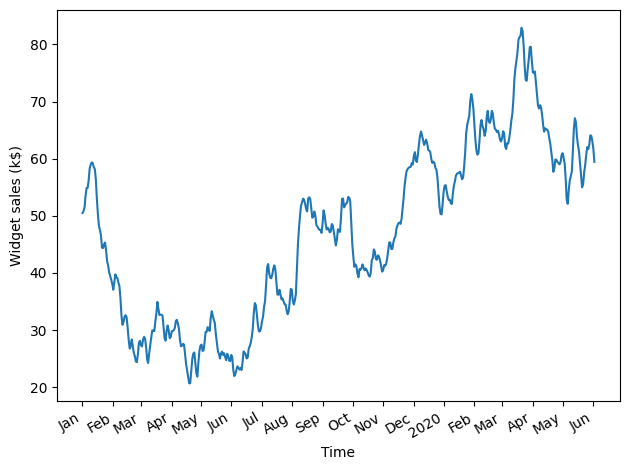

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')
plt.xticks(
[0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409,
439, 468, 498],
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()

El siguiente paso es probar la estacionariedad. Sabemos intuitivamente que la serie no es estacionaria, ya que hay una tendencia observable en la figura 4.4. Sin embargo, utilizaremos la prueba ADF para asegurarnos.

In [4]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['widget_sales'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605


Esto resulta en una estadística ADF de -1.51 y un valor p de 0.53. Aquí, la estadística ADF no es un número negativo grande, y el valor p es mayor que 0.05. Por lo tanto, `nuestra serie temporal no es estacionaria`, y debemos aplicar transformaciones para hacerla estacionaria.

Para hacer que nuestra serie sea estacionaria, intentaremos estabilizar la tendencia aplicando una diferenciación de primer orden. 

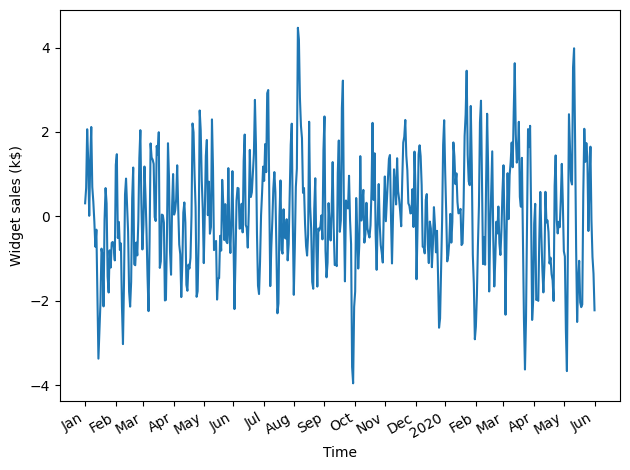

In [6]:
import numpy as np
widget_sales_diff = np.diff(df['widget_sales'], n=1)
fig, ax = plt.subplots()
ax.plot(widget_sales_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')
plt.xticks(
[0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409,
439, 468, 498],
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()

Podemos ver que hemos eliminado con éxito el componente de tendencia a largo plazo de nuestra serie, ya que los valores se mantienen alrededor de 0 durante todo el período. Ahora que se ha aplicado una transformación a nuestra serie, podemos probar la estacionariedad nuevamente utilizando la prueba ADF

In [7]:
ADF_result = adfuller(widget_sales_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19


Esto da una estadística ADF de -10.6 y un valor p de 7 × 10–19. Por lo tanto, con una estadística ADF negativa grande y un valor p mucho menor que 0.05, podemos decir que nuestra serie es estacionaria.

Nuestro siguiente paso es trazar la función de autocorrelación. La biblioteca statsmodels incluye convenientemente la función plot_acf. Simplemente pasamos nuestra serie diferenciada y especificamos el número de rezagos en el parámetro lags. Recuerda que el número de rezagos determina el rango de valores en el eje x.

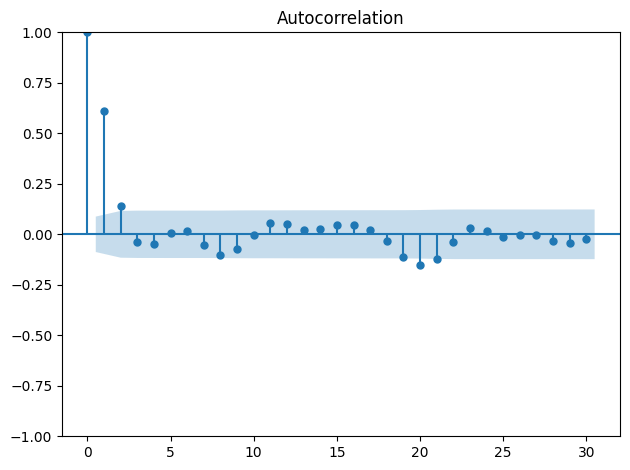

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(widget_sales_diff, lags=30);
plt.tight_layout()

En el  gráfico de ACF resultante ue se muestra en la  anterior digura, notarás que `hay coeficientes significativos hasta el rezago 2`. Luego se vuelven abruptamente no significativos, ya que permanecen en el área sombreada del gráfico. `Esto significa que tenemos un proceso de media móvil estacionario de orden 2`. Hay algunos coeficientes significativos alrededor del rezago 20, pero esto probablemente se deba al azar, ya que no son significativos entre los rezagos 3 y 20 y después del rezago 20.

Podemos usar un modelo de media móvil de segundo orden, o modelo MA(2), para predecir nuestra serie temporal estacionaria.

`Puedes ver cómo el gráfico de ACF nos ayuda a determinar el orden de un proceso de media móvil. El gráfico de ACF mostrará coeficientes de autocorrelación significativos hasta el rezago q, después del cual todos los coeficientes no serán significativos. Entonces podemos concluir que tenemos un proceso de media móvil de orden q, o un proceso MA(q).`

## Pronosticando un proceso de media movil

Una vez que se identifica el orden del proceso de media móvil, podemos ajustar el modelo a nuestros datos de entrenamiento y comenzar a hacer pronósticos. En nuestro caso, descubrimos que el volumen diferenciado de ventas de widgets es un proceso de media móvil de orden 2, o un proceso MA(2).

`El modelo de media móvil asume estacionariedad`, lo que significa que nuestras previsiones deben hacerse sobre una serie temporal estacionaria. `Por lo tanto, entrenaremos y probaremos nuestro modelo con el volumen diferenciado de ventas de widgets`. Probaremos dos técnicas de pronóstico ingenuas y ajustaremos un modelo de media móvil de segundo orden. Los pronósticos ingenuos servirán como bases para evaluar el rendimiento del modelo de media móvil, que esperamos que sea mejor que las bases, ya que previamente identificamos que nuestro proceso es un proceso de media móvil de orden 2.

Una vez que obtengamos nuestras previsiones para el proceso estacionario, tendremos que realizar una transformación inversa de las previsiones, lo que significa que debemos deshacer el proceso de diferenciación para llevar las previsiones de vuelta a su escala original.

En este escenario, asignaremos el 90% de los datos al conjunto de entrenamiento y reservaremos el otro 10% para el conjunto de prueba, lo que significa que debemos pronosticar 50 pasos de tiempo hacia el futuro. Asignaremos nuestros datos diferenciales a un DataFrame y luego dividiremos los datos.

In [12]:
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})
train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]
print(len(train))
print(len(test))
print(f'total datos diferenciados {len(df_diff)}')

449
50
total datos diferenciados 499


Ahora podemos visualizar el periodo de pronóstico para las series diferenciadas y originales. Aquí haremos dos subgráficas en la misma figura.

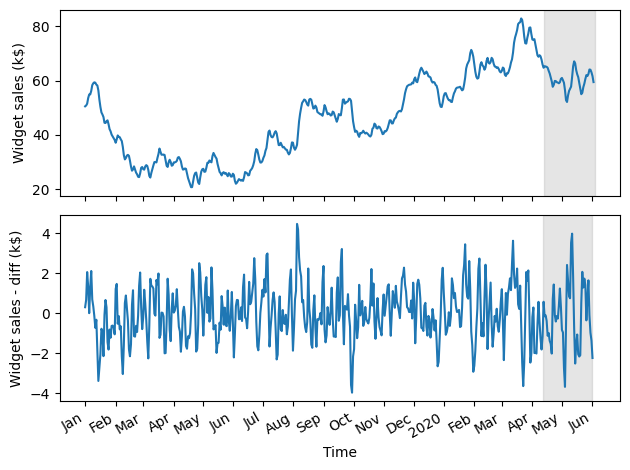

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)
ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)
plt.xticks(
[0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468,
498],
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()

Período de pronóstico para la serie original y la serie diferenciada. `Recuerde que nuestra serie diferenciada tiene un punto de datos menos que en su estado original`.

Para el horizonte de pronóstico, el modelo de media móvil presenta una particularidad. El modelo MA(q) no nos permite pronosticar 50 pasos hacia el futuro de una sola vez. `Recuerda que el modelo de media móvil es linealmente dependiente de los términos de error pasados`, y esos términos no se observan en el conjunto de datos; por lo tanto, deben ser estimados recursivamente. `Esto significa que para un modelo MA(q)`, `solo podemos pronosticar q pasos hacia el futuro`. Cualquier predicción hecha más allá de ese punto no tendrá términos de error pasados, y el modelo solo predecirá la media. Por lo tanto, no hay valor añadido en pronosticar más allá de q pasos en el futuro, porque las predicciones serán planas, ya que solo se devuelve la media, que es equivalente a un modelo base.

`Para evitar predecir simplemente la media más allá de dos pasos de tiempo en el futuro`, necesitamos desarrollar una función que prediga dos pasos de tiempo o menos a la vez, hasta que se realicen 50 predicciones, para que podamos comparar nuestras predicciones con los valores observados del conjunto de prueba.

`Este método se llama pronósticos en rolling`. En la primera pasada, entrenaremos con los primeros 449 pasos de tiempo y predeciremos los pasos de tiempo 450 y 451. Luego, en la segunda pasada, entrenaremos con los primeros 451 pasos de tiempo y predeciremos los pasos de tiempo 452 y 453. Esto se repite hasta que finalmente predecimos los valores en los pasos de tiempo 498 y 499.

Compararemos nuestro modelo MA(2) ajustado con dos referencias: la media histórica y el último valor. De esta manera, podemos asegurarnos de que un modelo MA(2) ofrecerá mejores predicciones que las previstas de forma ingenua, lo cual debería ser el caso, ya que sabemos que el proceso estacionario es un proceso MA(2).

`NOTA`: `No es necesario pronosticar dos pasos adelante cuando realizas pronósticos en movimiento con un modelo MA(2)`. Puedes pronosticar uno o dos pasos adelante de forma repetida para evitar predecir solo la media. De manera similar, con un modelo MA(3), podrías realizar pronósticos en movimiento con pronósticos de uno, dos o tres pasos adelante.

- A continuación, definimos nuestra función `rolling_forecast`. Tomará un DataFrame, la longitud del conjunto de entrenamiento, el horizonte de pronóstico, un tamaño de ventana y un método. El DataFrame contiene toda la serie temporal.
- El parámetro train_len inicializa el número de puntos de datos que se pueden usar para ajustar un modelo. A medida que se realizan predicciones, podemos actualizar esto para simular la observación de nuevos valores y luego usarlos para hacer la siguiente secuencia de pronósticos.
- `El parámetro de horizonte` es igual a la longitud del conjunto de prueba y representa cuántos valores deben ser predichos.
- `El parámetro de window` especifica cuántos pasos de tiempo se predicen a la vez. En nuestro caso, dado que tenemos un proceso MA(2), la ventana será igual a 2.
- El parámetro del método especifica qué modelo utilizar. La misma función nos permite generar pronósticos a partir de los métodos ingenuos y el modelo MA(2).

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int,window: int, method: str) -> list:
    total_len = train_len + horizon
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    
    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value
    
    elif method == 'MA':
        pred_MA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        return pred_MA


- La función recibe un DataFrame que contiene el proceso completo de promedio móvil simulado. También pasamos la longitud del conjunto de entrenamiento (800 en este caso) y el horizonte de la previsión (200). El siguiente parámetro especifica cuántos pasos a la vez deseamos prever (2). Finalmente, especificamos el método a utilizar para hacer las previsiones.
- El modelo MA(q) es parte del modelo SARIMAX más complejo.
- El método `predicted_mean` nos permite recuperar el valor real de la previsión tal como lo define la biblioteca statsmodels.

Una vez que se define, podemos usar nuestra función y pronosticar utilizando tres métodos: la media histórica, el último valor y el modelo MA(2) ajustado.

Primero, crearemos un DataFrame para contener nuestras predicciones y lo llamaremos pred_df. Podemos copiar el conjunto de prueba para incluir los valores reales en pred_df, lo que facilitará la evaluación del rendimiento de nuestros modelos.

Luego, especificaremos algunas constantes. En Python, es una buena práctica nombrar las constantes con letras mayúsculas. TRAIN_LEN es simplemente la longitud de nuestro conjunto de entrenamiento, HORIZON es la longitud del conjunto de prueba, que es de 50 días, y WINDOW puede ser 1 o 2 porque estamos utilizando un modelo MA(2). En este caso, utilizaremos un valor de 2.

A continuación, utilizaremos nuestra función rolling_forecast para generar una lista de predicciones para cada método. Cada lista de predicciones se almacena luego en su propia columna en pred_df.


In [15]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')

pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW,'last')

pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA
pred_df.head()

,widget_sales_diff,pred_mean,pred_last_value,pred_MA
449,-1.170131,0.034319,-1.803658,-1.078833
450,0.580967,0.034319,-1.803658,-0.273309
451,-0.144902,0.032861,0.580967,0.781223
452,-0.096564,0.032861,0.580967,0.234969
453,-0.372334,0.032183,-0.096564,0.168994


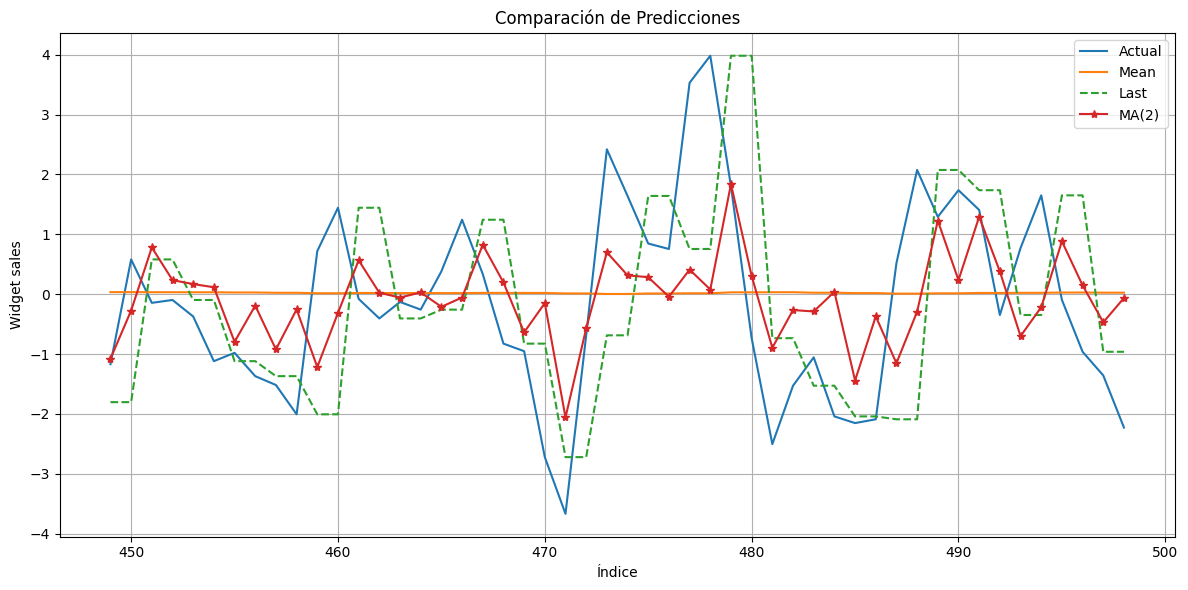

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff['widget_sales_diff'][449:], label ='Actual')
plt.plot(pred_df['pred_mean'], label='Mean')
plt.plot(pred_df['pred_last_value'],'--', label='Last')
plt.plot(pred_df['pred_MA'],'-*', label='MA(2)')
plt.title('Comparación de Predicciones')
plt.xlabel('Índice')
plt.ylabel('Widget sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El siguiente paso es medir el rendimiento de nuestros modelos. Para ello, calcularemos el error cuadrático medio (ECM). Aquí utilizaremos la función mean_squared_error del paquete sklearn. Simplemente necesitamos pasar los valores observados y los valores predichos a la función.

In [22]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(pred_df['widget_sales_diff'],pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['widget_sales_diff'],pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['widget_sales_diff'],pred_df['pred_MA'])
print(mse_mean, mse_last, mse_MA)

2.5606299456880537 3.2494260812249225 1.9481714497863145


Esto imprime un MSE de 2.56 para el método de media histórica, 3.25 para el método del último valor y 1.95 para el modelo MA(2). Aquí nuestro modelo MA(2) es el método de pronóstico de mejor rendimiento, ya que su MSE es el más bajo de los tres métodos. Esto es esperado, porque previamente identificamos un proceso de media móvil de segundo orden para el volumen diferenciado de ventas de widgets, lo que resulta en un MSE más pequeño en comparación con los métodos de pronóstico ingenuos. 

`Ahora que tenemos nuestro modelo campeón en la serie estacionaria`, `necesitamos invertir la transformación de nuestras predicciones para devolverlas a la escala original del conjunto de datos no transformado`. Recuerda que la diferenciación es el resultado de la diferencia entre un valor en el tiempo t y su valor anterio.

`Para invertir nuestra diferencia de primer orden`, necesitamos agregar un valor inicial $y_0$ al primer valor diferenciado $y'_1$. De esa manera, podemos recuperar $y_1$  en su escala original. Esto es lo que se demuestra en la siguiente ecuación:
$$ y_1 = y_0 + y'_1 = y_0 + y_1 – y_0 = y_1$$

Entonces $y_2$ se puede obtener utilizando una suma acumulativa de los valores diferenciados, como se muestra en la siguiente ecuación.
$$y_2 = y_0 + y'_1 + y'_2 = y_0 + y_1– y_0 + y_2– y_1 = (y_0– y_0) + (y_1– y_1) + y_2 = y_2$$
`Aplicar la suma acumulativa una vez anulará una diferenciación de primer orden`. En el caso de que la serie se haya diferenciado dos veces para volverse estacionaria, tendríamos que repetir este proceso.

In [ ]:
df['pred_widget_sales'] = pd.Series()
#Invierta la transformación de las predicciones para volverlas a la escala original del conjunto de datos.
df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()

/tmp/ipykernel_31775/888517700.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()
/tmp/ipykernel_31775/888517700.py:2: SettingWithCopyWarning: 
A val

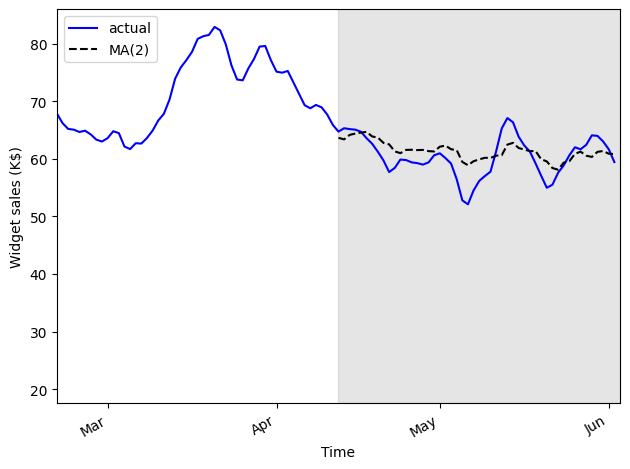

In [24]:
fig, ax = plt.subplots()
ax.plot(df['widget_sales'], 'b-', label='actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')
ax.axvspan(450, 500, color='#808080', alpha=0.2)
ax.set_xlim(400, 500)
plt.xticks(
[409, 439, 468, 498],
['Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()

Se puede ver en la figura que nuestra curva de pronóstico, mostrada con una línea punteada, sigue la tendencia general de los valores observados, aunque no predice valles y picos más grandes. El paso final es informar el MSE en el conjunto de datos original. En un entorno profesional, no informaríamos las predicciones diferenciadas, porque no tienen sentido desde una perspectiva empresarial; debemos informar los valores y los errores en la escala original de los datos.

Podemos medir el error absoluto medio (MAE) utilizando la función mean_absolute_error de sklearn. Usaremos esta métrica porque es fácil de interpretar, ya que devuelve el promedio de la diferencia absoluta entre los valores predichos y los valores reales, en lugar de una diferencia cuadrada como el MSE.

In [25]:
from sklearn.metrics import mean_absolute_error
mae_MA_undiff = mean_absolute_error(df['widget_sales'].iloc[450:],df['pred_widget_sales'].iloc[450:])
print(mae_MA_undiff)

2.324470924451404


Esto imprime un MAE de 2.32. Por lo tanto, nuestras predicciones están, en promedio, desfasadas por $2,320, ya sea por encima o por debajo del valor real. Recuerda que nuestros datos tienen unidades de miles de dólares, así que multiplicamos el MAE por 1,000 para expresar la diferencia absoluta promedio.

# Proximos pasos

En este capítulo, cubrimos el proceso de promedio móvil y cómo se puede modelar con un modelo MA(q), donde q es el orden. Aprendiste que para identificar un proceso de promedio móvil, debes estudiar el gráfico ACF una vez que sea estacionario. El gráfico ACF mostrará picos significativos hasta el rezago q, y el resto no será significativamente diferente de 0.

Sin embargo, `es posible que al estudiar el gráfico ACF de un proceso estacionario, observes un patrón sinusoidal`, con coeficientes negativos y autocorrelación significativa a grandes retardos. Por ahora, puedes simplemente aceptar que este no es un proceso de media móvil.

Cuando vemos un `patrón sinusoidal en el gráfico ACF de un proceso estacionario`, esto es una pista de que un `proceso autorregresivo está en juego`, y debemos usar un `modelo AR(p)` para producir nuestra previsión. Al igual que el modelo MA(q), el modelo AR(p) requerirá que identifiquemos su orden. Esta vez tendremos que trazar la función de autocorrelación parcial y ver en qué rezago los coeficientes de repente se vuelven no significativos. El próximo capítulo se centrará completamente en el proceso autorregresivo, cómo identificar su orden y cómo prever tal proceso.


# Resumen

- Un proceso de media móvil establece que `el valor presente es linealmente dependiente de la media`, el término de error presente y los términos de error pasados. `Los términos de error se distribuyen normalmente.`
- Puedes identificar el orden q de un proceso de media móvil estacionaria estudiando el gráfico de ACF. Los coeficientes son significativos hasta el rezago q solamente.
- `Puedes predecir hasta q pasos en el futuro` porque los términos de error no se observan en los datos y deben ser estimados recursivamente.
- Predecir más allá de q pasos en el futuro simplemente devolverá la media de la serie. Para evitar eso, puedes aplicar pronósticos móviles.
- Si aplicas una transformación a los datos, debes deshacerla para devolver tus predicciones a la escala original de los datos.
- El modelo de media móvil asume que los datos son estacionarios. Por lo tanto, solo se puede utilizar este modelo con datos estacionarios.